In [75]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import json

In [76]:
data = pd.read_csv("raw.tsv", sep='\t')

In [77]:
data

,id,instruments,genres,place,coordinates,is-danced,youtube-id,start-ts,end-ts
0,abelokoutsoura,Voice|Violin|Santouri|Laouto,Traditional|Nisiotiko|Aegean,Aegean-sea|Icaria,37.600502446388|26.159290600739173,0,Zy8tjrTf4sg,2819,2986
1,ach-annio-mou-syrtos-banas-i-cheriatkos-trapan...,Voice|Tsampouna|Percussion|Accordion,Traditional|Thracian,Thrace,40.99020017616846|26.004757197151037,1,vLTBEHw011s,5481,5638
2,ach-ellada,Voice|Piano|Guitar|Bouzouki|Bass|Accordion,Laiko,NaN,NaN,0,cKXi8_5_Rd4,3795,4024
3,adramytiano-zeimbekiko-2,Violin|Trumpet|Trombone|Santouri|Percussion|Kl...,Traditional|Nisiotiko|Aegean,Aegean-sea|Lesbos,39.23867882632123|26.256429816602346,1,mp1pK6b1Oho,2551,2688
4,aerinos,Voice|Violin|Percussion|Laouto|Klarino,Traditional|Central-Greek,Central-Greece,38.87601135662379|22.319114372276747,1,00SbCAkyXhQ,44,201
...,...,...,...,...,...,...,...,...,...
1565,zevgarotos-syrtos,Voice|Violin|Tambouras|Santouri|Percussion|Oud...,Traditional|Nisiotiko|Aegean,Aegean-sea|Oinousses,38.521245283255524|26.234145011851098,1,kJl_glSyJMo,1085,1500
1566,ziakas-strotos,Voice|Violin|Percussion|Laouto|Klarino,Traditional|Macedonian,Macedonia|Grevena,40.08538883719564|21.41961215567693,1,gMz1OBS9FlQ,535,744
1567,ziakas-tsiamikos,Voice|Violin|Percussion|Laouto|Klarino,Traditional|Macedonian,Macedonia|Grevena,40.08538883719564|21.41961215567693,1,gMz1OBS9FlQ,959,1187
1568,zise,Voice|Percussion|Guitar|Bouzouki|Bass|Accordion,Laiko,NaN,NaN,0,pxhw04LZhiY,2739,2935


In [78]:
original_song_ids = [filename.removesuffix(".mp3") for filename in os.listdir("../data/scripts/cropped/") if filename.endswith(".mp3")]

In [79]:
print(len(original_song_ids))

1046


In [80]:
filtered_data_df = data[data['id'].isin(original_song_ids)] 

In [81]:
filtered_data_df = filtered_data_df.reset_index(drop=True)

In [82]:
filtered_data_df.head(3)

,id,instruments,genres,place,coordinates,is-danced,youtube-id,start-ts,end-ts
0,abelokoutsoura,Voice|Violin|Santouri|Laouto,Traditional|Nisiotiko|Aegean,Aegean-sea|Icaria,37.600502446388|26.159290600739173,0,Zy8tjrTf4sg,2819,2986
1,adramytiano-zeimbekiko-2,Violin|Trumpet|Trombone|Santouri|Percussion|Kl...,Traditional|Nisiotiko|Aegean,Aegean-sea|Lesbos,39.23867882632123|26.256429816602346,1,mp1pK6b1Oho,2551,2688
2,afino-geia-sti-geitonia,Voice|Violin|Tambouras|Santouri|Percussion|Oud...,Traditional|Macedonian,Macedonia,40.910884328073564|23.22153108200181,0,6ZDyC-wpRXM,1258,1488


In [83]:
nan_counts = filtered_data_df.isna().sum()

# Get the columns with NaN values
columns_with_nans = nan_counts[nan_counts > 0]

# Print columns with NaN values and their counts
print("Columns with NaN values and their counts:")
print(columns_with_nans)

Columns with NaN values and their counts:
place          204
coordinates    204
dtype: int64


In [84]:
filtered_data_df = filtered_data_df.fillna("N/A")

In [85]:
mapping = {0: "no", 1: "yes"}
filtered_data_df['is-danced'] = filtered_data_df['is-danced'].map(mapping)

In [86]:
filtered_data_df.head(3)

,id,instruments,genres,place,coordinates,is-danced,youtube-id,start-ts,end-ts
0,abelokoutsoura,Voice|Violin|Santouri|Laouto,Traditional|Nisiotiko|Aegean,Aegean-sea|Icaria,37.600502446388|26.159290600739173,no,Zy8tjrTf4sg,2819,2986
1,adramytiano-zeimbekiko-2,Violin|Trumpet|Trombone|Santouri|Percussion|Kl...,Traditional|Nisiotiko|Aegean,Aegean-sea|Lesbos,39.23867882632123|26.256429816602346,yes,mp1pK6b1Oho,2551,2688
2,afino-geia-sti-geitonia,Voice|Violin|Tambouras|Santouri|Percussion|Oud...,Traditional|Macedonian,Macedonia,40.910884328073564|23.22153108200181,no,6ZDyC-wpRXM,1258,1488


In [87]:
def convert_to_list(sentence):
    return sentence.split("|")

In [88]:
filtered_data_df['instruments'] = filtered_data_df['instruments'].apply(convert_to_list)
filtered_data_df['genres'] = filtered_data_df['genres'].apply(convert_to_list)
filtered_data_df['place'] = filtered_data_df['place'].apply(convert_to_list)

In [89]:
cols_to_analyze = ['instruments', 'genres', 'place', 'is-danced']

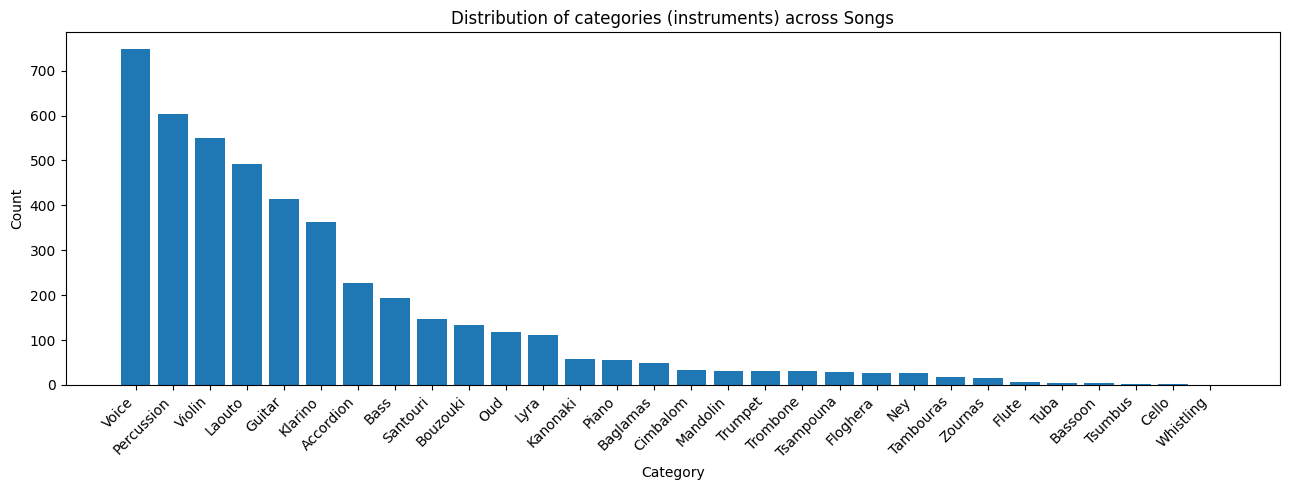

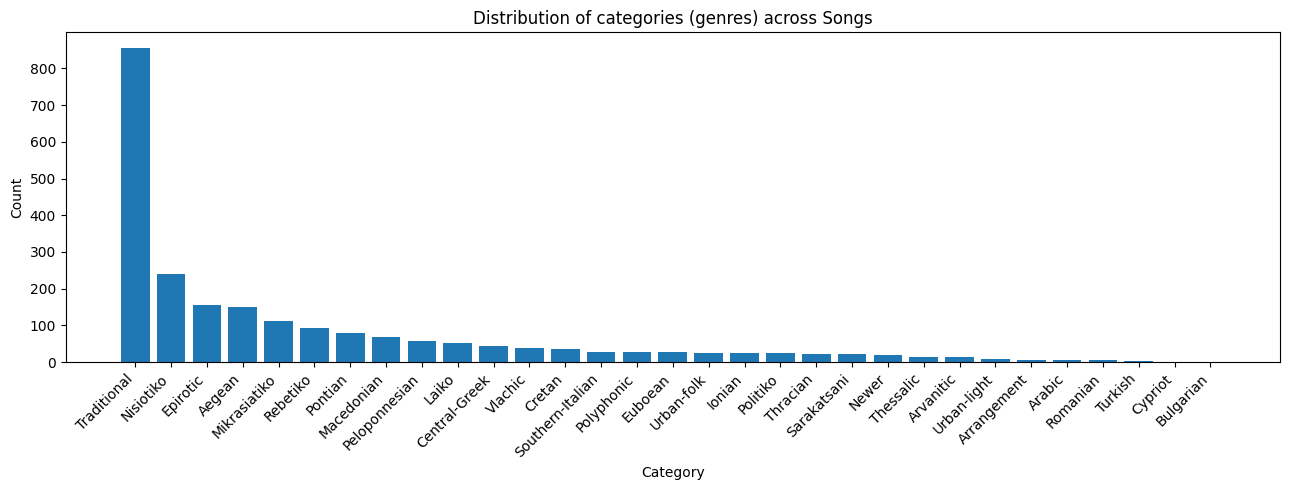

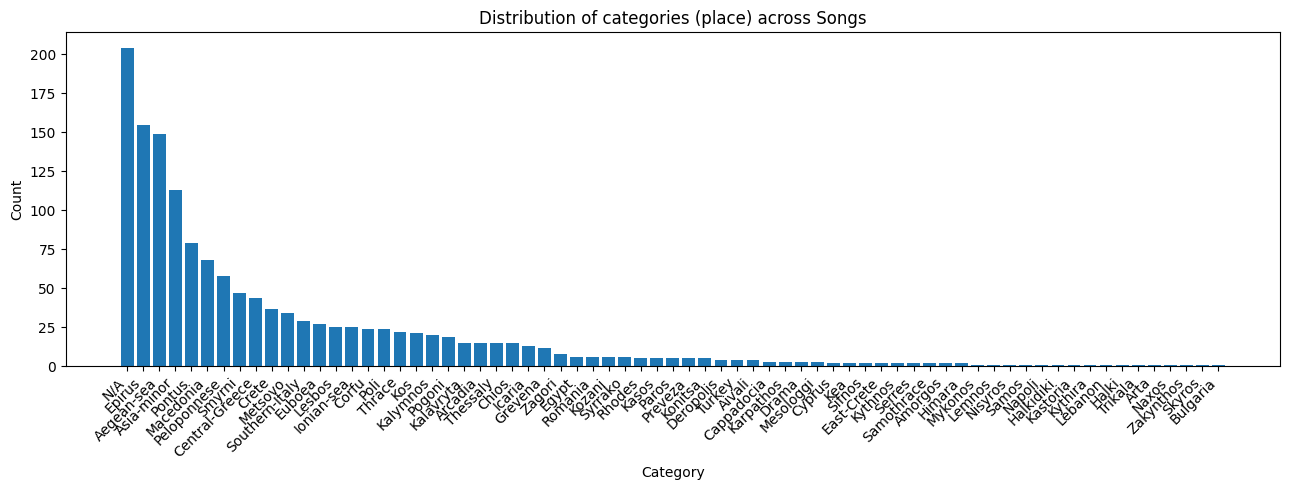

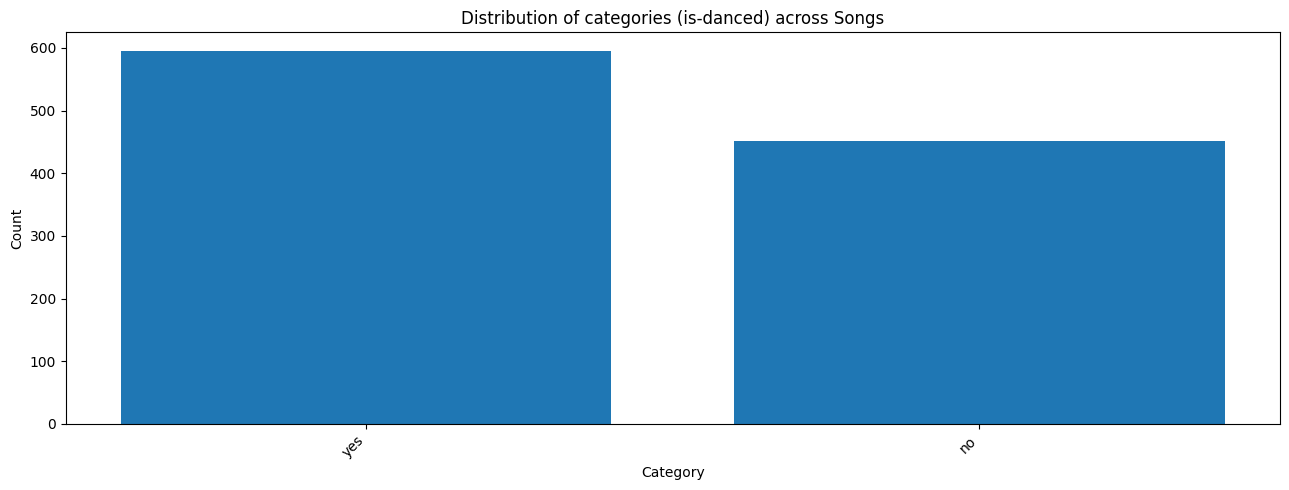

In [90]:
# Iterate over instrument columns
for column in cols_to_analyze:
    if column != "is-danced":
        # Step 1: Flatten the column
        flattened_df = filtered_data_df[['id',column]].explode(column)
    else:
        flattened_df = filtered_data_df[['id', column]]
    # Step 2: Perform analysis
    distribution = flattened_df[column].value_counts()
    
    # Step 3: Plot the distribution
    plt.figure(figsize=(13,5))
    plt.bar(distribution.index, distribution.values)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title(f'Distribution of categories ({column}) across Songs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [91]:
df = filtered_data_df

In [92]:
contingency_table = pd.crosstab(df['instruments'].apply(lambda x: ', '.join(x)), df['place'].apply(lambda x: ', '.join(x)))

Chi-square statistic: 24744.094100941278
p-value: 0.0


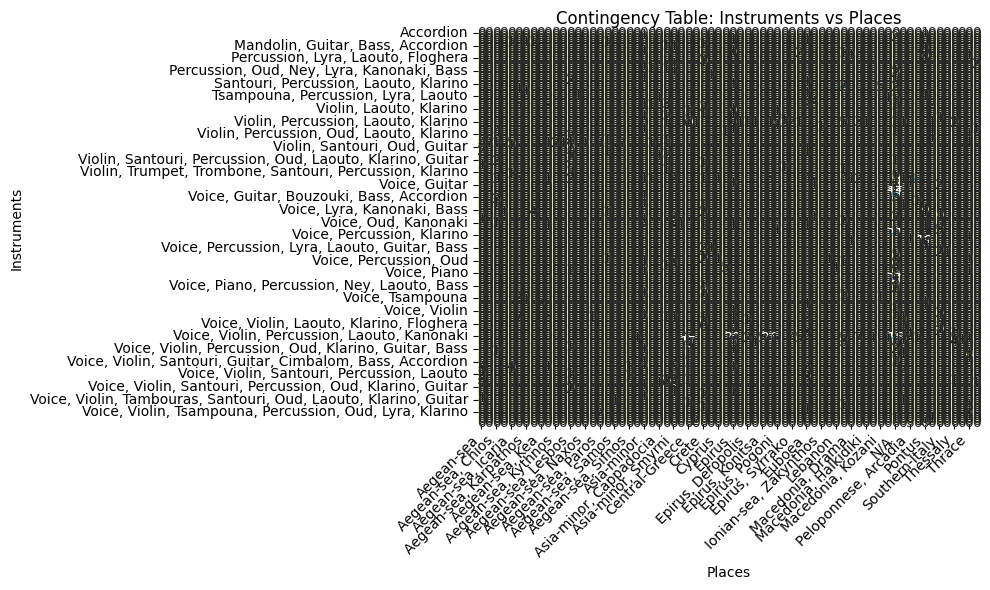

In [93]:
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print Chi-square test result
print("Chi-square statistic:", chi2)
print("p-value:", p)

# Step 3: Visualize the Relationship
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", cbar=False)
plt.xlabel('Places')
plt.ylabel('Instruments')
plt.title('Contingency Table: Instruments vs Places')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [94]:
filtered_data_df.head(3)

,id,instruments,genres,place,coordinates,is-danced,youtube-id,start-ts,end-ts
0,abelokoutsoura,"[Voice, Violin, Santouri, Laouto]","[Traditional, Nisiotiko, Aegean]","[Aegean-sea, Icaria]",37.600502446388|26.159290600739173,no,Zy8tjrTf4sg,2819,2986
1,adramytiano-zeimbekiko-2,"[Violin, Trumpet, Trombone, Santouri, Percussi...","[Traditional, Nisiotiko, Aegean]","[Aegean-sea, Lesbos]",39.23867882632123|26.256429816602346,yes,mp1pK6b1Oho,2551,2688
2,afino-geia-sti-geitonia,"[Voice, Violin, Tambouras, Santouri, Percussio...","[Traditional, Macedonian]",[Macedonia],40.910884328073564|23.22153108200181,no,6ZDyC-wpRXM,1258,1488


In [95]:
def extract_region(places):
    return places[0]

def extract_subregion(places):
    return places[-1]

def extract_main_genre(genres):
    return genres[0]

def extract_secondary_genre(genres):
    if len(genres) >= 3:
        return genres[1]
    else:
        return genres[-1]
    
def extract_sub_genre(genres):
    return genres[-1]

In [96]:
filtered_data_df['region'] = filtered_data_df['place'].apply(extract_region)
filtered_data_df['sub-region'] = filtered_data_df['place'].apply(extract_subregion)

In [97]:
filtered_data_df.head(3)

,id,instruments,genres,place,coordinates,is-danced,youtube-id,start-ts,end-ts,region,sub-region
0,abelokoutsoura,"[Voice, Violin, Santouri, Laouto]","[Traditional, Nisiotiko, Aegean]","[Aegean-sea, Icaria]",37.600502446388|26.159290600739173,no,Zy8tjrTf4sg,2819,2986,Aegean-sea,Icaria
1,adramytiano-zeimbekiko-2,"[Violin, Trumpet, Trombone, Santouri, Percussi...","[Traditional, Nisiotiko, Aegean]","[Aegean-sea, Lesbos]",39.23867882632123|26.256429816602346,yes,mp1pK6b1Oho,2551,2688,Aegean-sea,Lesbos
2,afino-geia-sti-geitonia,"[Voice, Violin, Tambouras, Santouri, Percussio...","[Traditional, Macedonian]",[Macedonia],40.910884328073564|23.22153108200181,no,6ZDyC-wpRXM,1258,1488,Macedonia,Macedonia


In [98]:
filtered_data_df['main_genre'] = filtered_data_df['genres'].apply(extract_main_genre)
filtered_data_df['secondary_genre'] = filtered_data_df['genres'].apply(extract_secondary_genre)
filtered_data_df['sub-genre'] = filtered_data_df['genres'].apply(extract_sub_genre)

In [99]:
filtered_data_df

,id,instruments,genres,place,coordinates,is-danced,youtube-id,start-ts,end-ts,region,sub-region,main_genre,secondary_genre,sub-genre
0,abelokoutsoura,"[Voice, Violin, Santouri, Laouto]","[Traditional, Nisiotiko, Aegean]","[Aegean-sea, Icaria]",37.600502446388|26.159290600739173,no,Zy8tjrTf4sg,2819,2986,Aegean-sea,Icaria,Traditional,Nisiotiko,Aegean
1,adramytiano-zeimbekiko-2,"[Violin, Trumpet, Trombone, Santouri, Percussi...","[Traditional, Nisiotiko, Aegean]","[Aegean-sea, Lesbos]",39.23867882632123|26.256429816602346,yes,mp1pK6b1Oho,2551,2688,Aegean-sea,Lesbos,Traditional,Nisiotiko,Aegean
2,afino-geia-sti-geitonia,"[Voice, Violin, Tambouras, Santouri, Percussio...","[Traditional, Macedonian]",[Macedonia],40.910884328073564|23.22153108200181,no,6ZDyC-wpRXM,1258,1488,Macedonia,Macedonia,Traditional,Macedonian,Macedonian
3,afta-ta-oraia-matia-sou,"[Voice, Violin, Guitar, Accordion]","[Traditional, Nisiotiko, Ionian]","[Ionian-sea, Corfu]",39.65199074735927|19.832436424805493,yes,t60GoECE0p8,4840,4971,Ionian-sea,Corfu,Traditional,Nisiotiko,Ionian
4,aftalikos-2,"[Violin, Percussion, Oud, Klarino, Kanonaki]","[Traditional, Nisiotiko, Aegean]","[Aegean-sea, Chios]",38.42426026626016|26.058525334235867,yes,J-PqcxTXtp4,4126,4340,Aegean-sea,Chios,Traditional,Nisiotiko,Aegean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,zeimpekiko,"[Santouri, Percussion, Guitar]","[Traditional, Nisiotiko, Aegean]","[Aegean-sea, Lesbos]",39.23867882632123|26.256429816602346,no,mp1pK6b1Oho,1132,1220,Aegean-sea,Lesbos,Traditional,Nisiotiko,Aegean
1042,ziakas-strotos,"[Voice, Violin, Percussion, Laouto, Klarino]","[Traditional, Macedonian]","[Macedonia, Grevena]",40.08538883719564|21.41961215567693,yes,gMz1OBS9FlQ,535,744,Macedonia,Grevena,Traditional,Macedonian,Macedonian
1043,ziakas-tsiamikos,"[Voice, Violin, Percussion, Laouto, Klarino]","[Traditional, Macedonian]","[Macedonia, Grevena]",40.08538883719564|21.41961215567693,yes,gMz1OBS9FlQ,959,1187,Macedonia,Grevena,Traditional,Macedonian,Macedonian
1044,zise,"[Voice, Percussion, Guitar, Bouzouki, Bass, Ac...",[Laiko],[N/A],N/A,no,pxhw04LZhiY,2739,2935,N/A,N/A,Laiko,Laiko,Laiko


In [100]:
all_instruments = set(instrument for instruments_list in filtered_data_df['instruments'] for instrument in instruments_list)

In [101]:
for instrument in all_instruments:
    filtered_data_df[instrument] = filtered_data_df['instruments'].apply(lambda x: 'yes' if instrument in x else 'no')

In [102]:
filtered_data_df.head(3)

,id,instruments,genres,place,coordinates,is-danced,youtube-id,start-ts,end-ts,region,...,Accordion,Oud,Mandolin,Ney,Tsampouna,Tuba,Bassoon,Percussion,Bouzouki,Tsumbus
0,abelokoutsoura,"[Voice, Violin, Santouri, Laouto]","[Traditional, Nisiotiko, Aegean]","[Aegean-sea, Icaria]",37.600502446388|26.159290600739173,no,Zy8tjrTf4sg,2819,2986,Aegean-sea,...,no,no,no,no,no,no,no,no,no,no
1,adramytiano-zeimbekiko-2,"[Violin, Trumpet, Trombone, Santouri, Percussi...","[Traditional, Nisiotiko, Aegean]","[Aegean-sea, Lesbos]",39.23867882632123|26.256429816602346,yes,mp1pK6b1Oho,2551,2688,Aegean-sea,...,no,no,no,no,no,no,no,yes,no,no
2,afino-geia-sti-geitonia,"[Voice, Violin, Tambouras, Santouri, Percussio...","[Traditional, Macedonian]",[Macedonia],40.910884328073564|23.22153108200181,no,6ZDyC-wpRXM,1258,1488,Macedonia,...,no,yes,no,no,no,no,no,yes,no,no


In [103]:
cols_to_drop = ['instruments','genres', 'place', 'coordinates', 'youtube-id', 'start-ts', 'end-ts']
check_duplicates = filtered_data_df[['id', 'youtube-id']]
df = filtered_data_df.drop(columns=cols_to_drop)

In [104]:
df.head(3)

,id,is-danced,region,sub-region,main_genre,secondary_genre,sub-genre,Lyra,Cimbalom,Whistling,...,Accordion,Oud,Mandolin,Ney,Tsampouna,Tuba,Bassoon,Percussion,Bouzouki,Tsumbus
0,abelokoutsoura,no,Aegean-sea,Icaria,Traditional,Nisiotiko,Aegean,no,no,no,...,no,no,no,no,no,no,no,no,no,no
1,adramytiano-zeimbekiko-2,yes,Aegean-sea,Lesbos,Traditional,Nisiotiko,Aegean,no,no,no,...,no,no,no,no,no,no,no,yes,no,no
2,afino-geia-sti-geitonia,no,Macedonia,Macedonia,Traditional,Macedonian,Macedonian,no,no,no,...,no,yes,no,no,no,no,no,yes,no,no


In [105]:
starts = filtered_data_df['start-ts']
ends = filtered_data_df['end-ts']
times = ends - starts

In [106]:
filtered_data_df.to_csv('preprocessed_dataset.csv')

In [32]:
import statistics
meam_time = statistics.mean(times)

In [33]:
meam_time

177.0057361376673

In [34]:
ids = set(filtered_data_df['youtube-id'].to_list())

In [35]:
len(ids)

47

In [48]:
id = 'oWRoD8XR6A8'
if id in ids:
    print('DUPLICATE!')

In [43]:
egypt = df[df['region'] == 'Egypt']

In [44]:
egypt['id']

103                aziza
104              aziza-2
198                dolap
438           lamma-bada
1033         yamali-sham
1034    yashadi-el-alhan
Name: id, dtype: object

In [49]:
import json

In [51]:
#Load the JSON data from the file
with open('new_data.json', 'r') as json_file:
    data = json.load(json_file)

# Open a CSV file for writing
with open('new_data.csv', 'w') as file:
    # Write the header
    file.write("id;region;subregion;start-ts;end-ts\n")
    start = 0
    end = 180
    # Iterate through the JSON data
    for region, subregions in data.items():
        if isinstance(subregions, dict):
            for subregion, ids in subregions.items():
                for id in ids:
                    file.write(f"{id};{region};{subregion};{start};{end}\n")
        else:
            for id in subregions:
                file.write(f"{id};{region};N/A;{start};{end}\n")

In [52]:
import csv

# Path to the input CSV file
input_file_path = 'new_data.csv'

# Path to the output CSV file
output_file_path = 'new_data_v2.csv'

# Open the input CSV file for reading
with open(input_file_path, 'r') as input_file:
    csv_reader = csv.reader(input_file)
    
    # Read the header
    header = next(csv_reader)
    
    # Add the new column name to the header
    header.append('id')
    
    # Read the remaining rows
    rows = list(csv_reader)

# Open the output CSV file for writing
with open(output_file_path, 'w', newline='') as output_file:
    csv_writer = csv.writer(output_file)
    
    # Write the updated header
    csv_writer.writerow(header)
    
    # Write the rows with the new 'youtube-id' column
    for index, row in enumerate(rows):
        row.append(str(index))  # Add the index as the 'youtube-id'
        csv_writer.writerow(row)

In [55]:
import pandas as pd
new_dataset_full = pd.read_csv('new_data_v2.csv',sep=';')

In [56]:
new_dataset_full

,youtube-id,region,subregion,start-ts,end-ts,id
0,Wq9T2tBb7bQ,Aegean-sea,Icaria,0,180,0
1,edwvUO9GquM,Aegean-sea,Icaria,0,180,1
2,Gj_uyOxBhZI,Aegean-sea,Icaria,0,180,2
3,SMDLYFO8PuM,Aegean-sea,Icaria,0,180,3
4,BIT8XUCZJP8,Aegean-sea,Icaria,0,180,4
...,...,...,...,...,...,...
439,6lBGH9oebI4,Thrace,NaN,0,180,439
440,i4X8wScj5Ng,Thrace,NaN,0,180,440
441,JO0oq-EDBTE,Thrace,NaN,0,180,441
442,NhGAK5WW654,Thrace,NaN,0,180,442


In [61]:
import os
cropped_list = [int(filename.removesuffix(".mp3")) for filename in os.listdir('../data/scripts/cropped2')]

In [62]:
cropped_list

[236,
 222,
 424,
 342,
 356,
 418,
 381,
 395,
 140,
 154,
 82,
 96,
 168,
 183,
 69,
 197,
 41,
 55,
 7,
 54,
 6,
 40,
 68,
 196,
 182,
 97,
 169,
 83,
 155,
 141,
 394,
 380,
 357,
 431,
 425,
 343,
 223,
 237,
 221,
 235,
 209,
 433,
 355,
 341,
 427,
 369,
 396,
 382,
 157,
 143,
 95,
 81,
 194,
 180,
 4,
 56,
 42,
 43,
 5,
 57,
 181,
 195,
 80,
 94,
 142,
 156,
 383,
 397,
 368,
 340,
 426,
 432,
 354,
 208,
 234,
 220,
 218,
 224,
 230,
 378,
 350,
 436,
 422,
 344,
 393,
 387,
 90,
 84,
 152,
 146,
 53,
 1,
 47,
 191,
 185,
 184,
 190,
 46,
 52,
 0,
 147,
 153,
 85,
 91,
 386,
 392,
 423,
 345,
 351,
 437,
 379,
 225,
 219,
 233,
 227,
 409,
 347,
 421,
 435,
 353,
 384,
 390,
 87,
 179,
 93,
 145,
 151,
 44,
 2,
 50,
 78,
 186,
 192,
 193,
 79,
 187,
 3,
 51,
 45,
 150,
 144,
 92,
 86,
 178,
 391,
 385,
 434,
 352,
 420,
 408,
 226,
 232,
 255,
 241,
 269,
 296,
 282,
 321,
 335,
 309,
 123,
 137,
 22,
 36,
 23,
 136,
 122,
 308,
 334,
 320,
 283,
 297,
 268,
 240,
 254,
 242,

In [66]:
all_songs_list = new_dataset_full['id'].to_list()

In [67]:
all_songs_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [68]:
all_songs_set = set(all_songs_list)
cropped_songs_set = set(cropped_list)

In [69]:
missing_songs_ids = list(all_songs_set - cropped_songs_set)

In [71]:
len(missing_songs_ids)

12

In [72]:
len(cropped_list)

432

In [73]:
missing_songs_df = new_dataset_full[new_dataset_full['id'].isin(missing_songs_ids)]

In [74]:
missing_songs_df.to_csv('missing_songs.csv')

In [24]:
import pandas as pd
final_df = pd.read_csv('../data/scripts/gr_folk_music.csv')
region_counts = final_df['region'].value_counts().sort_values(ascending=False)

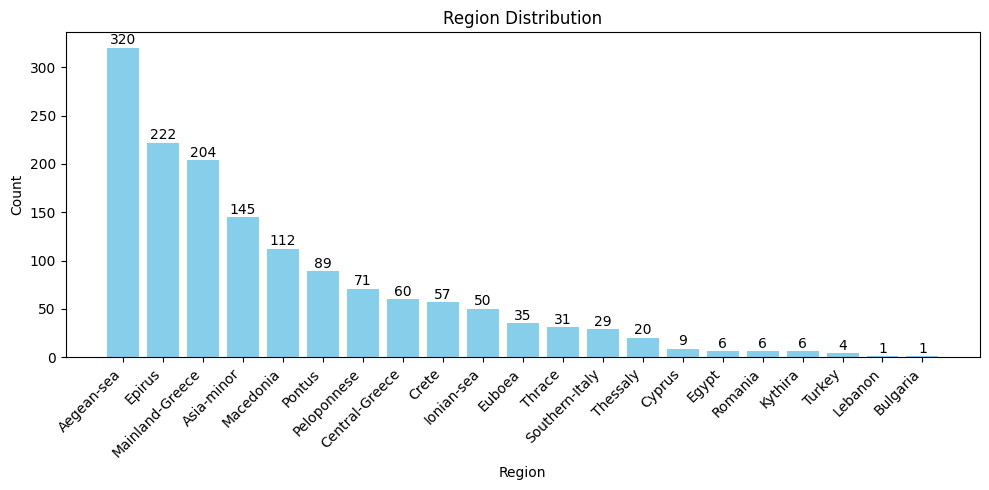

In [25]:
import matplotlib.pyplot as plt
# Plotting the number of occurrences of each region using plt.plot()
plt.figure(figsize=(10, 5))
bars = plt.bar(region_counts.index, region_counts.values, color='skyblue')

# Adding titles and labels
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(int(bar.get_height())), 
             ha='center', va='bottom')

# Rotate x-axis labels with an angle
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()